## Zac Winzurk
## BMI 330 Homework-5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Import Excel File into Pandas DataFrame

In [2]:
df = pd.read_csv('T2D-microarray-data.csv')
df.head()

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532833,GSM532834,GSM532835,GSM532836,GSM532837,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0,290.3,317.8,301.0,337.8,299.6,...,215.9,140.2,139.9,110.6,104.7,138.8,100.5,131.5,123.4,98.8
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0,196.9,215.2,228.3,225.0,235.9,...,178.3,185.8,160.2,140.3,181.5,111.2,132.4,160.9,156.9,187.9
2,ILMN_1705116,SLC22A23,"solute carrier family 22, member 23",SLC22A23,63027.0,8.5,21.6,11.1,12.2,11.0,...,32.8,56.3,47.4,35.6,39.6,45.9,33.2,21.8,62.6,32.2
3,ILMN_2165473,MID1IP1,MID1 interacting protein 1,MID1IP1,58526.0,327.2,244.1,262.4,276.9,253.7,...,311.8,388.1,343.6,416.7,368.1,416.3,351.1,469.0,292.0,367.6
4,ILMN_1662865,CPPED1,calcineurin-like phosphoesterase domain contai...,CPPED1,55313.0,166.7,141.2,116.6,110.6,143.5,...,166.2,155.9,196.5,240.3,280.5,338.3,151.0,298.0,275.3,173.2


In [3]:
len(df)

11066

In [4]:
cols = list(df.columns[5:])

# Normalization

### Task 1: Box plots of original data

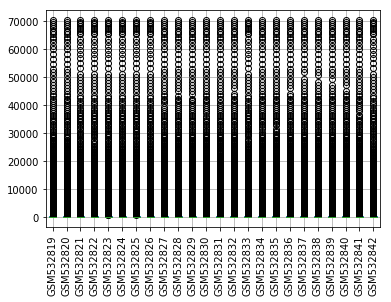

In [5]:
df.boxplot(column=cols)
plt.xticks(rotation=90)
plt.show()

In [6]:
df_id = df[['ID_REF','IDENTIFIER','Gene title','Gene symbol','Gene ID']]
df_id.head()

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0
2,ILMN_1705116,SLC22A23,"solute carrier family 22, member 23",SLC22A23,63027.0
3,ILMN_2165473,MID1IP1,MID1 interacting protein 1,MID1IP1,58526.0
4,ILMN_1662865,CPPED1,calcineurin-like phosphoesterase domain contai...,CPPED1,55313.0


In [7]:
# Drop the string variable so that applymap() can run
df_log = df.drop(['ID_REF','IDENTIFIER','Gene title','Gene symbol','Gene ID'], axis=1)

### Task 2: Log Transformation

In [8]:
# Return the square root of every cell in the dataframe
df_log = df_log.applymap(math.log)

### Task 3: Box Plots of Log Transformed Data

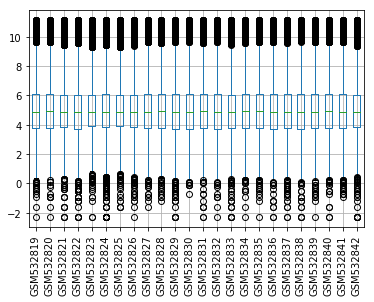

In [9]:
df_log.boxplot(column=cols)
plt.xticks(rotation=90)
plt.show()

### Task 4:

** The log transformed data should be used for subsequent analysis. **

### Task 5:

** Based on the data we do not need to perform between-sample normalization. **

# Differential Analysis

### Task 6: T-Test

In [10]:
from scipy.stats import ttest_ind

In [11]:
ttest_arr = ttest_ind(df_log.iloc[:, :8], df_log.iloc[:, 8:], axis=1)

In [12]:
ttest_arr

Ttest_indResult(statistic=array([ 6.03901554,  5.87871522, -6.21385443, ..., -0.46331788,
       -0.2075496 ,  0.05433902]), pvalue=array([  4.44993126e-06,   6.47109612e-06,   2.96767147e-06, ...,
         6.47687414e-01,   8.37489873e-01,   9.57155507e-01]))

In [13]:
df_log['ttest'] = ttest_arr[0]

### Tast 7: Fold Change

In [14]:
df_log['pvalue'] = ttest_arr[1]

In [15]:
df_final = pd.merge(df_id, df_log, left_index=True, right_index=True)

In [16]:
df_final.head()

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532835,GSM532836,GSM532837,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842,ttest,pvalue
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0,5.670915,5.761422,5.707110,5.822454,5.702448,...,4.940928,4.705920,4.651099,4.933034,4.610158,4.879007,4.815431,4.593098,6.039016,0.000004
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0,5.282696,5.371568,5.430661,5.416100,5.463408,...,5.076423,4.943783,5.201256,4.711330,4.885828,5.080783,5.055609,5.235910,5.878715,0.000006
2,ILMN_1705116,SLC22A23,"solute carrier family 22, member 23",SLC22A23,63027.0,2.140066,3.072693,2.406945,2.501436,2.397895,...,3.858622,3.572346,3.678829,3.826465,3.502550,3.081910,4.136765,3.471966,-6.213854,0.000003
3,ILMN_2165473,MID1IP1,MID1 interacting protein 1,MID1IP1,58526.0,5.790572,5.497578,5.569870,5.623656,5.536152,...,5.839478,6.032367,5.908355,6.031406,5.861071,6.150603,5.676754,5.906995,-5.127272,0.000039
4,ILMN_1662865,CPPED1,calcineurin-like phosphoesterase domain contai...,CPPED1,55313.0,5.116196,4.950177,4.758749,4.705920,4.966335,...,5.280662,5.481888,5.636574,5.823933,5.017280,5.697093,5.617861,5.154447,-5.047421,0.000047


In [17]:
bon = df_final['pvalue'].multiply(3)

### Task 8: Perform Bonferri Corrections

** 2 genes are differentially expressed at a false discovery rate cutoff of 0.05 **

In [18]:
df_final['Bonferri Corr'] = df_final['pvalue'].multiply(11066)

In [19]:
df_final[df_final['Bonferri Corr'] < 0.05]

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532836,GSM532837,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842,ttest,pvalue,Bonferri Corr
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0,5.670915,5.761422,5.707110,5.822454,5.702448,...,4.705920,4.651099,4.933034,4.610158,4.879007,4.815431,4.593098,6.039016,0.000004,0.049243
2,ILMN_1705116,SLC22A23,"solute carrier family 22, member 23",SLC22A23,63027.0,2.140066,3.072693,2.406945,2.501436,2.397895,...,3.572346,3.678829,3.826465,3.502550,3.081910,4.136765,3.471966,-6.213854,0.000003,0.032840


In [20]:
len(df_final[df_final['Bonferri Corr'] < 0.05])

2

In [21]:
df_final = df_final.sort_values('Bonferri Corr')

In [22]:
df_final

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532836,GSM532837,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842,ttest,pvalue,Bonferri Corr
2,ILMN_1705116,SLC22A23,"solute carrier family 22, member 23",SLC22A23,63027.0,2.140066,3.072693,2.406945,2.501436,2.397895,...,3.572346,3.678829,3.826465,3.502550,3.081910,4.136765,3.471966,-6.213854,0.000003,0.032840
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0,5.670915,5.761422,5.707110,5.822454,5.702448,...,4.705920,4.651099,4.933034,4.610158,4.879007,4.815431,4.593098,6.039016,0.000004,0.049243
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0,5.282696,5.371568,5.430661,5.416100,5.463408,...,4.943783,5.201256,4.711330,4.885828,5.080783,5.055609,5.235910,5.878715,0.000006,0.071609
13,ILMN_1720241,TRIP12,thyroid hormone receptor interactor 12,TRIP12,9320.0,6.510853,6.480811,6.135132,6.190520,6.080848,...,6.805279,6.698515,7.246724,6.586585,6.926184,6.676958,6.608945,-5.672054,0.000011,0.116516
77,ILMN_1742410,BCL2L1,BCL2-like 1,BCL2L1,598.0,5.269918,4.123903,4.115780,5.396804,4.440296,...,6.898210,5.411646,6.537416,6.498884,6.256901,6.306458,5.584623,-5.534624,0.000015,0.161439
796,ILMN_2401057,CANX,calnexin,CANX,821.0,6.490724,6.854882,6.841295,6.643138,6.884998,...,6.316804,6.378256,6.383507,6.436951,6.510853,6.474045,6.718892,5.334617,0.000024,0.260298
17,ILMN_2125010,SKAP2,src kinase associated phosphoprotein 2,SKAP2,8935.0,5.230039,4.708629,5.112590,5.589120,5.097424,...,6.102559,5.752573,5.673667,5.488938,5.970241,5.304299,5.503297,-5.302327,0.000025,0.281258
10,ILMN_2202940,CHPT1,choline phosphotransferase 1,CHPT1,56994.0,5.070789,4.433195,4.684905,4.920711,4.875960,...,5.943586,5.668155,5.410753,5.097424,5.033701,5.658436,5.356586,-5.263592,0.000028,0.308674
369,ILMN_1746426,TOMM70A,translocase of outer mitochondrial membrane 70...,TOMM70A,9868.0,6.265491,6.301703,6.240666,6.312279,6.272688,...,5.762366,6.044531,5.998688,6.150603,6.118097,6.074426,6.242418,5.148372,0.000037,0.407338
262,ILMN_1696556,URB2,URB2 ribosome biogenesis 2 homolog (S. cerevis...,URB2,9816.0,3.925926,3.955082,4.094345,4.180522,3.925926,...,3.250374,3.314186,3.332205,3.650658,3.804438,3.499533,3.799974,5.134367,0.000038,0.421333


### Task 9: Benjamini-Hochberg Corrections

** 220 genes are differentially expressed at a false discovery rate cutoff of 0.05 **

In [23]:
df_final['rank'] = np.arange(1,11067)

In [24]:
df_final['Benjamini-Hochberg'] = df_final['pvalue']*(11066/df_final['rank'])

In [25]:
len(df_final[df_final['Benjamini-Hochberg'] < 0.05])

220

In [28]:
cutoff = df_final[df_final['Benjamini-Hochberg'] < 0.05]
cutoff = cutoff.sort_values('Benjamini-Hochberg')
cutoff

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842,ttest,pvalue,Bonferri Corr,rank,Benjamini-Hochberg
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0,5.282696,5.371568,5.430661,5.416100,5.463408,...,4.711330,4.885828,5.080783,5.055609,5.235910,5.878715,0.000006,0.071609,3,0.023870
0,ILMN_1759232,IRS1,insulin receptor substrate 1,IRS1,3667.0,5.670915,5.761422,5.707110,5.822454,5.702448,...,4.933034,4.610158,4.879007,4.815431,4.593098,6.039016,0.000004,0.049243,2,0.024621
13,ILMN_1720241,TRIP12,thyroid hormone receptor interactor 12,TRIP12,9320.0,6.510853,6.480811,6.135132,6.190520,6.080848,...,7.246724,6.586585,6.926184,6.676958,6.608945,-5.672054,0.000011,0.116516,4,0.029129
20,ILMN_1802257,PCTP,phosphatidylcholine transfer protein,PCTP,58488.0,4.350278,3.716008,3.916015,3.777348,4.155753,...,4.776599,4.328098,4.686750,4.518522,4.248495,-5.019611,0.000050,0.555972,18,0.030887
5,ILMN_1734602,SRRM2,serine/arginine repetitive matrix 2,SRRM2,23524.0,8.099919,8.310710,8.487249,8.245647,8.434529,...,7.357620,7.805923,7.768914,8.068560,8.120440,4.896426,0.000068,0.749420,24,0.031226
14,ILMN_2358457,ATF4,activating transcription factor 4,ATF4,468.0,4.823502,4.420045,4.403054,4.266896,4.530447,...,5.288267,5.155601,4.802380,4.944495,4.385770,-4.982234,0.000055,0.608636,19,0.032033
9,ILMN_2352036,RTN4,reticulon 4,RTN4,57142.0,5.474369,5.170484,5.486041,5.224132,5.345201,...,6.152945,5.651787,5.978379,5.515845,5.650030,-5.026786,0.000049,0.546402,17,0.032141
2552,ILMN_1677038,CPED1,cadherin-like and PC-esterase domain containing 1,CPED1,79974.0,3.701302,3.852273,3.977811,3.440418,4.317488,...,3.430756,3.430756,3.374169,3.424263,3.360375,4.900763,0.000067,0.741573,23,0.032242
76,ILMN_1785141,MICAL2,"microtubule associated monooxygenase, calponin...",MICAL2,9645.0,3.367296,2.687847,3.414443,3.427515,3.284664,...,4.271095,4.099332,3.918005,4.465908,3.520461,-4.957896,0.000058,0.645610,20,0.032280
77,ILMN_1742410,BCL2L1,BCL2-like 1,BCL2L1,598.0,5.269918,4.123903,4.115780,5.396804,4.440296,...,6.537416,6.498884,6.256901,6.306458,5.584623,-5.534624,0.000015,0.161439,5,0.032288


### Task 10: Top Gene

In [29]:
cutoff.head(1)

,ID_REF,IDENTIFIER,Gene title,Gene symbol,Gene ID,GSM532819,GSM532820,GSM532821,GSM532822,GSM532823,...,GSM532838,GSM532839,GSM532840,GSM532841,GSM532842,ttest,pvalue,Bonferri Corr,rank,Benjamini-Hochberg
1,ILMN_1745806,PEMT,phosphatidylethanolamine N-methyltransferase,PEMT,10400.0,5.282696,5.371568,5.430661,5.4161,5.463408,...,4.71133,4.885828,5.080783,5.055609,5.23591,5.878715,0.000006,0.071609,3,0.02387


** Upregulated **

### Function
** Phosphatidylcholine (PC) is the most abundant mammalian phospholipid. This gene encodes an enzyme which converts phosphatidylethanolamine to phosphatidylcholine by sequential methylation in the liver. Another distinct synthetic pathway in nucleated cells converts intracellular choline to phosphatidylcholine by a three-step process. The protein isoforms encoded by this gene localize to the endoplasmic reticulum and mitochondria-associated membranes. Alternate splicing of this gene results in multiple transcript variants encoding different isoforms. - NCBI Database**